# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from datetime import date, datetime

In [8]:
#setting option to display all th ecolumns available
pd.set_option('display.max_columns', None)

**Loading the dataset**

In [9]:
data = pd.read_excel('/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/Classification/default of credit card clients.xls')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**we can see that the columns are wrongly named and the actual columns are in the first row of the dataset. So we have to raeplace the fisrt row as the feature names.**

In [10]:
data = pd.read_excel('/content/drive/MyDrive/Capstone/Machine Learning/Data/Supervised/Classification/default of credit card clients.xls',
                     names=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                            'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'])

In [11]:
data.drop(data.index[0:1], inplace=True)

In [12]:
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [13]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [15]:
data.shape

(30000, 25)

In [16]:
data.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_1                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

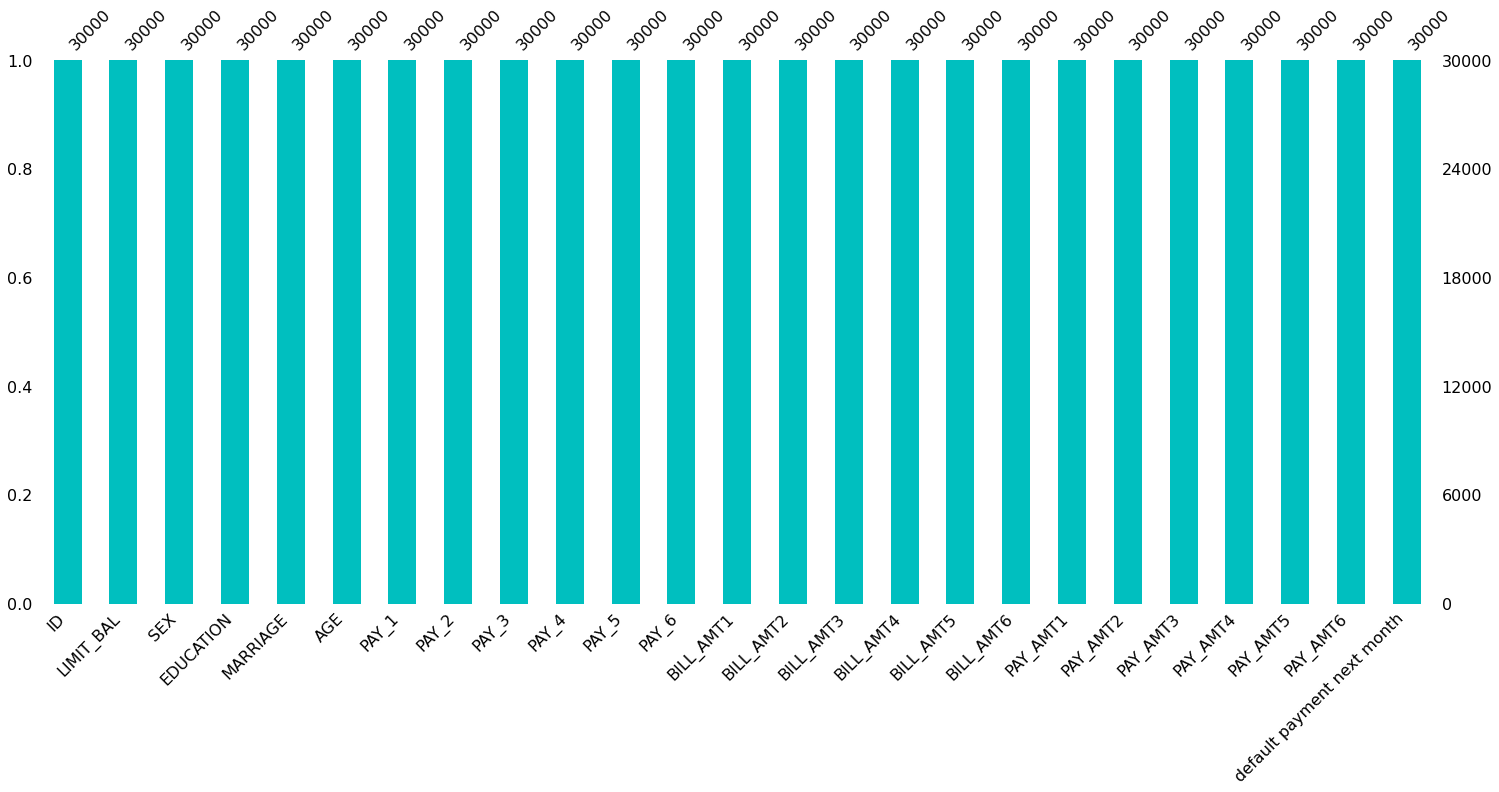

In [17]:
msno.bar(data, color='c')
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [19]:
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

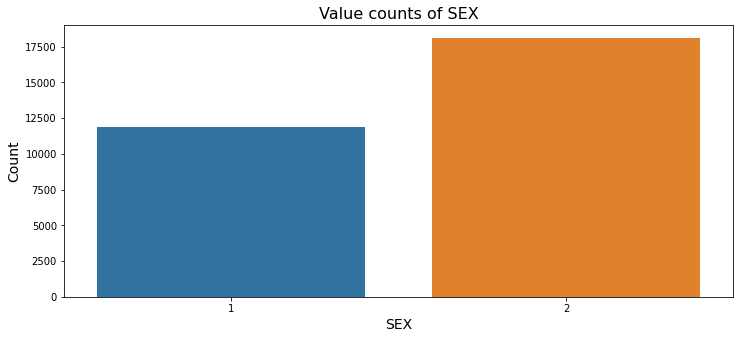

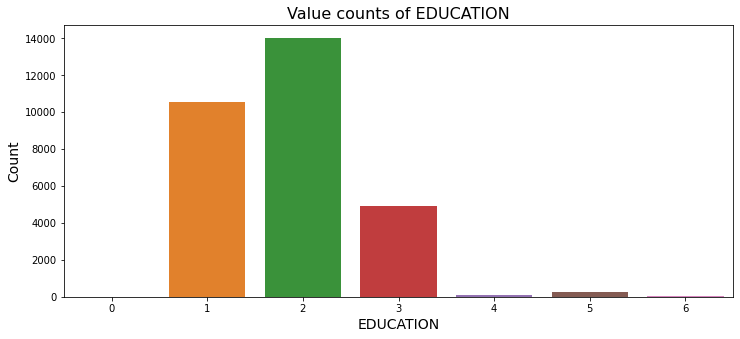

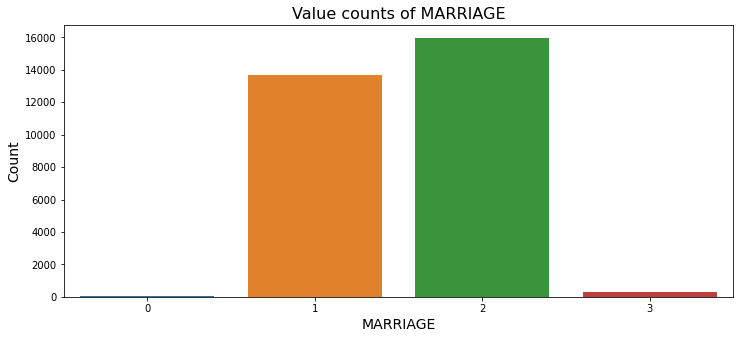

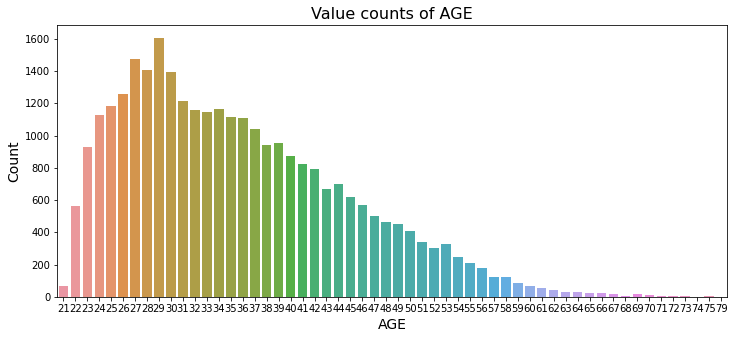

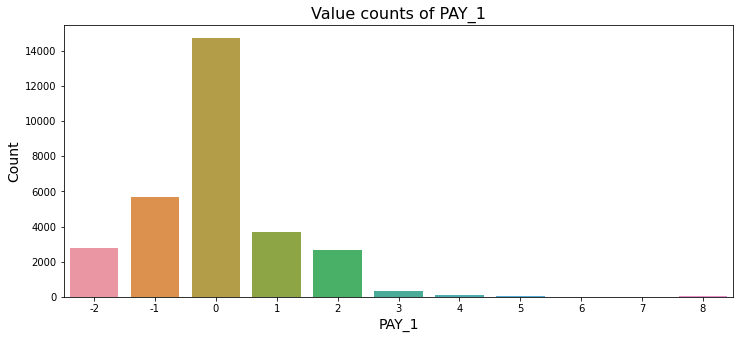

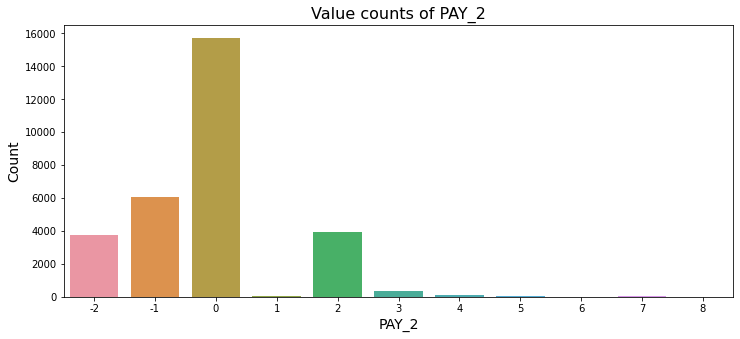

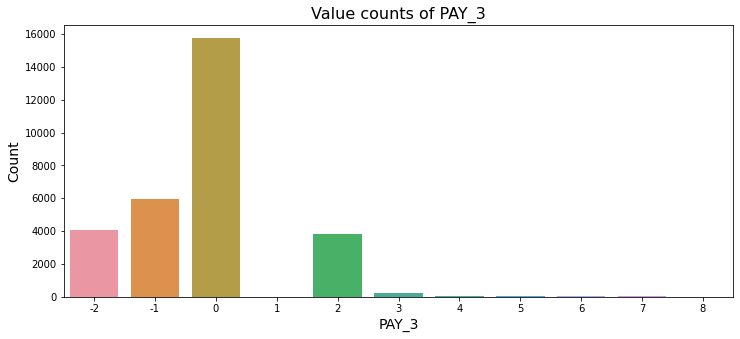

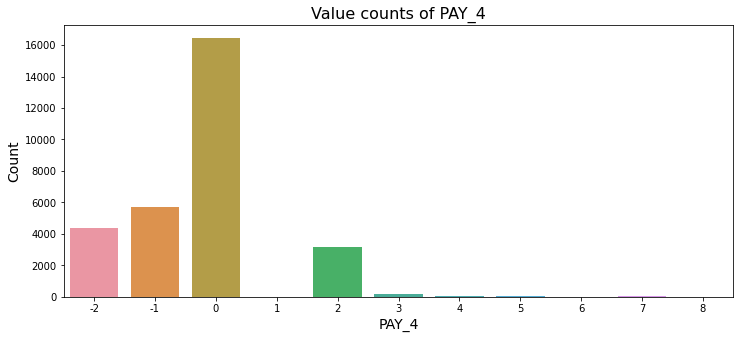

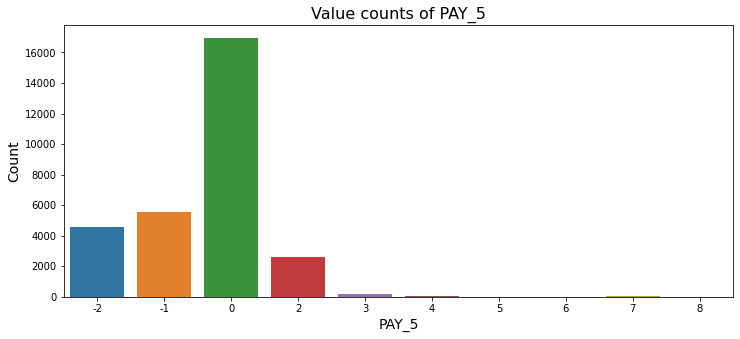

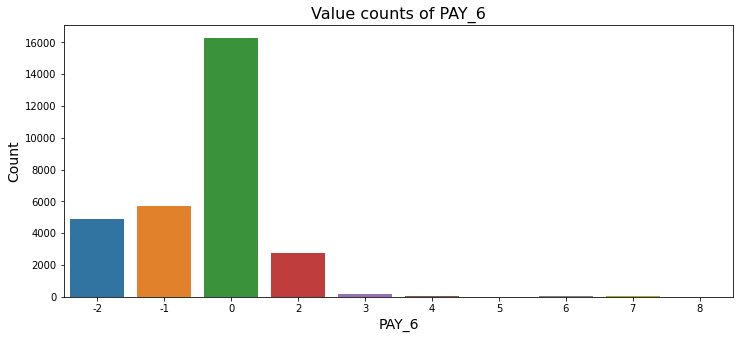

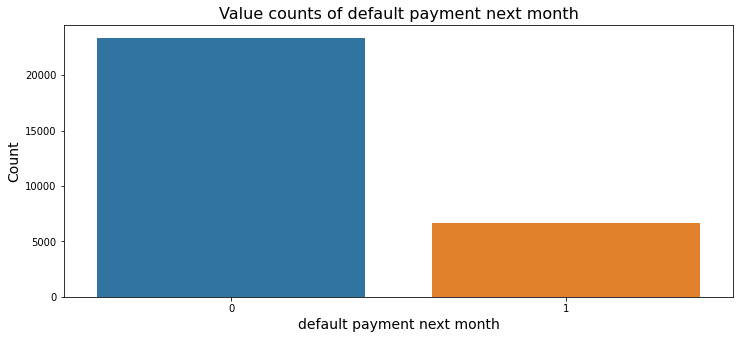

In [20]:
for col in features:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    sns.countplot(data[col])
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()

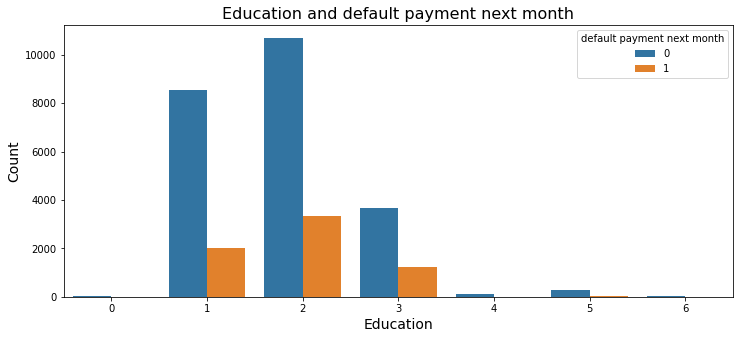

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, hue='default payment next month', x='EDUCATION')
plt.title('Education and default payment next month', size=16)
plt.xlabel('Education', size=14)
plt.ylabel('Count', size=14)
plt.show()

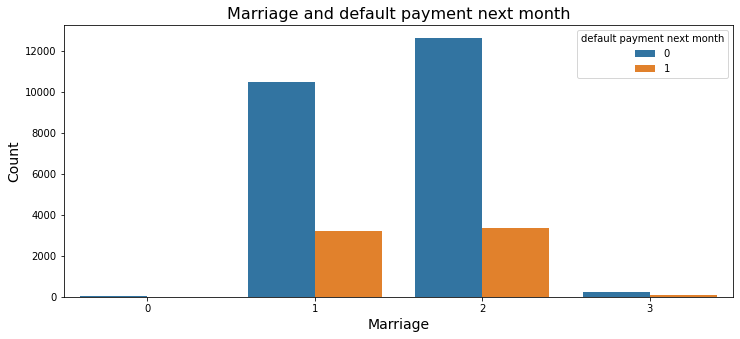

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, hue='default payment next month', x='MARRIAGE')
plt.title('Marriage and default payment next month', size=16)
plt.xlabel('Marriage', size=14)
plt.ylabel('Count', size=14)
plt.show()

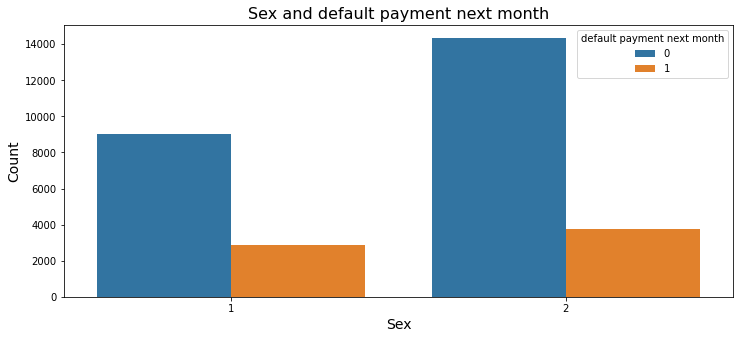

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=data, hue='default payment next month', x='SEX')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Sex', size=14)
plt.ylabel('Count', size=14)
plt.show()

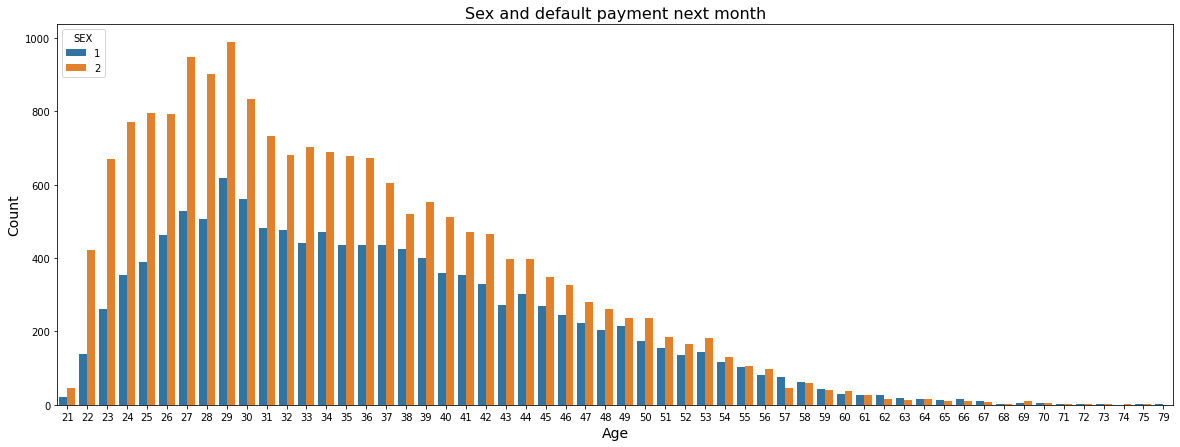

In [24]:
age = data.groupby(['AGE', 'SEX']).agg({'SEX':sum})

plt.figure(figsize=(20,7))
sns.countplot(data=data, x='AGE', hue='SEX')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

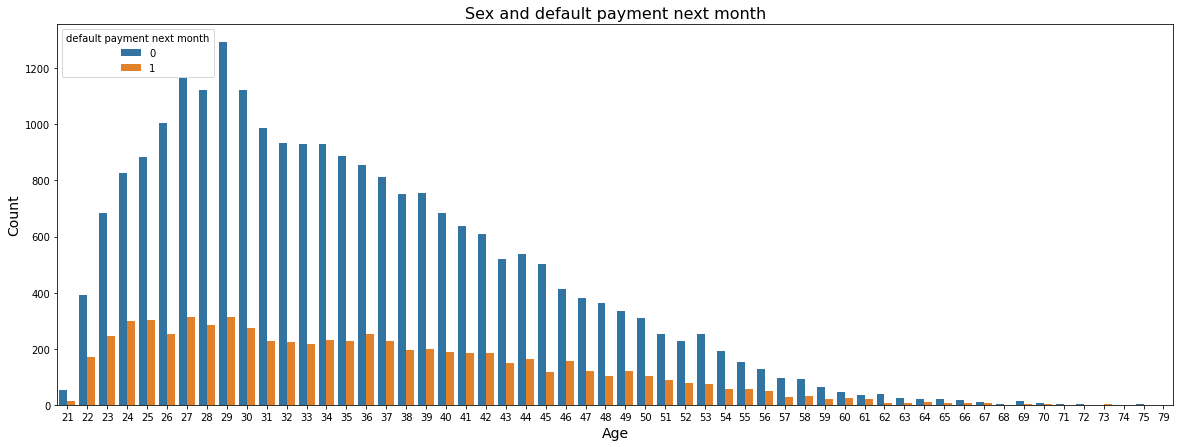

In [25]:
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='AGE', hue='default payment next month')
plt.title('Sex and default payment next month', size=16)
plt.xlabel('Age', size=14)
plt.ylabel('Count', size=14)
plt.show()

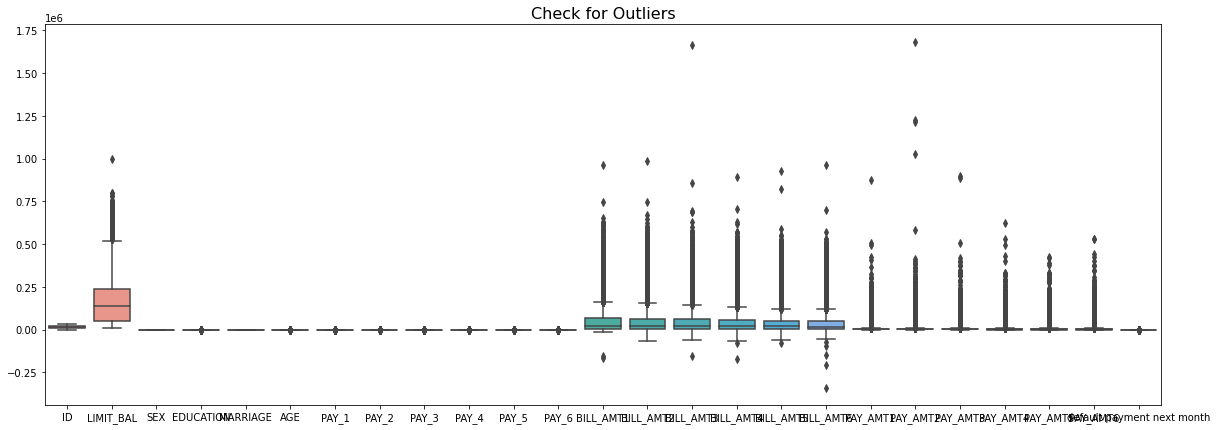

In [26]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)
plt.title('Check for Outliers', size=16)
plt.show()

In [27]:
def get_col_name(prefix):
    return [prefix+str(x) for x in range(1, 7)]

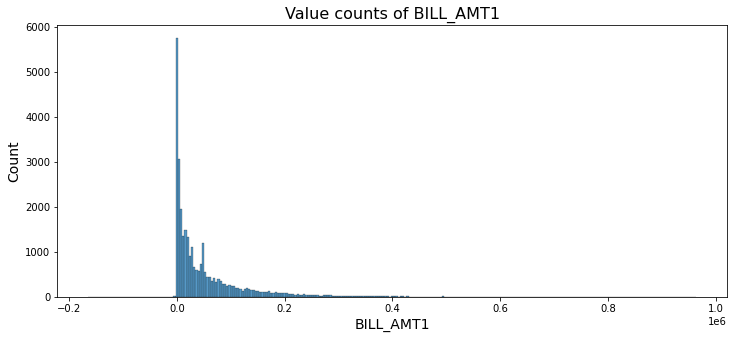

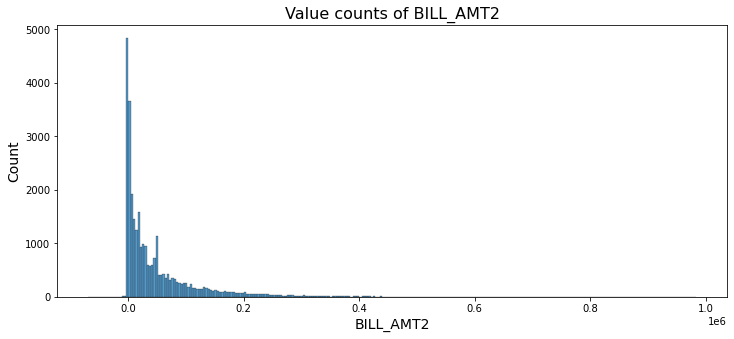

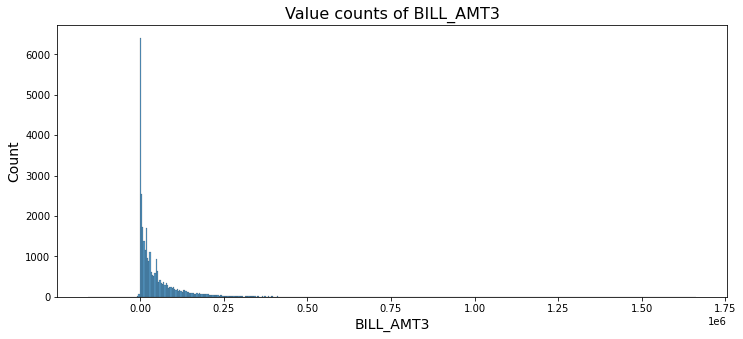

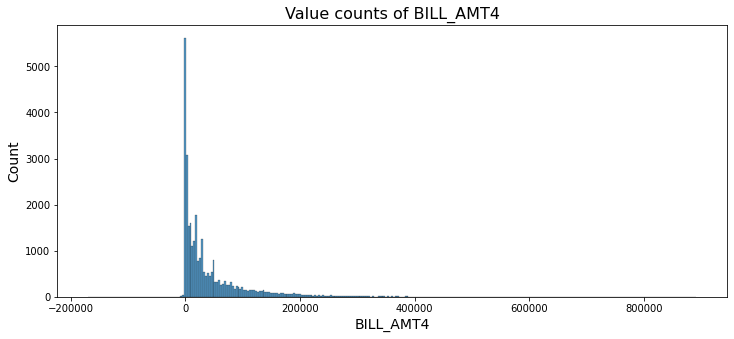

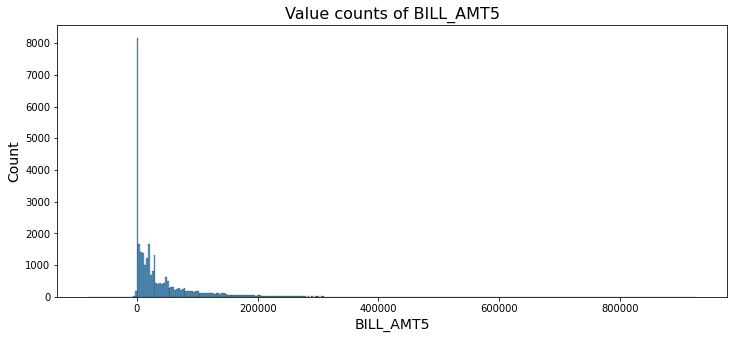

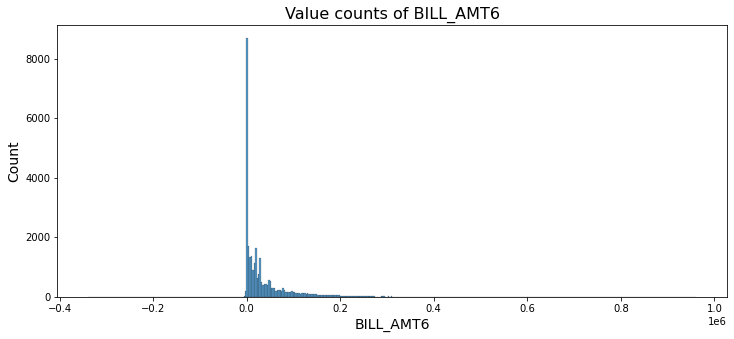

In [28]:
bill_amt = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for col in bill_amt:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    sns.histplot(data[col], ax=ax)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()

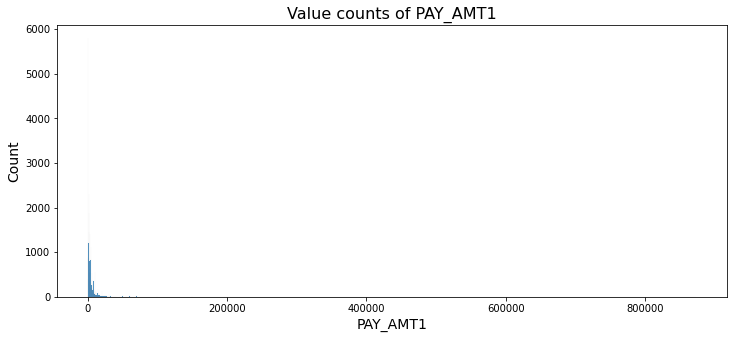

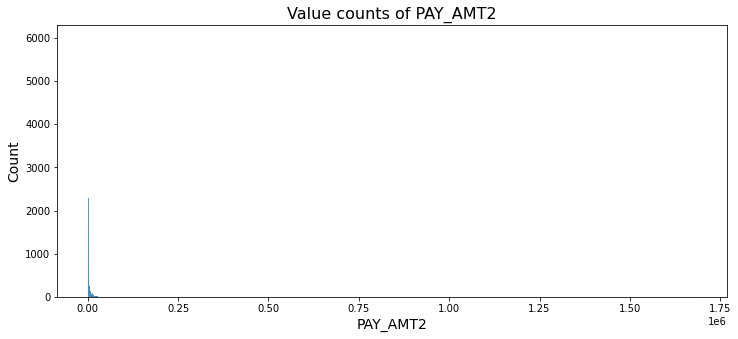

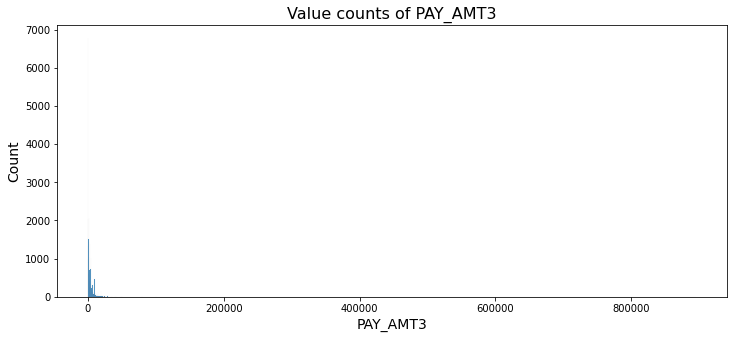

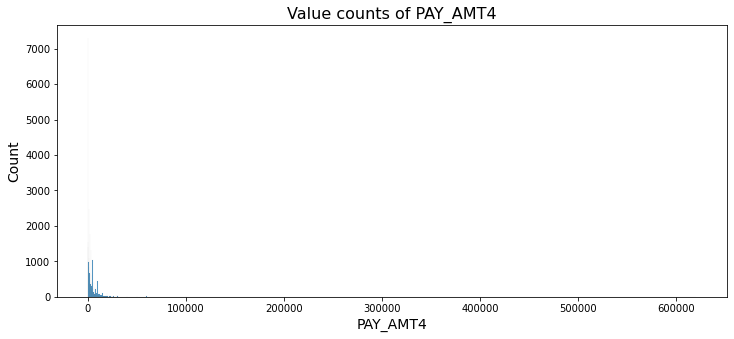

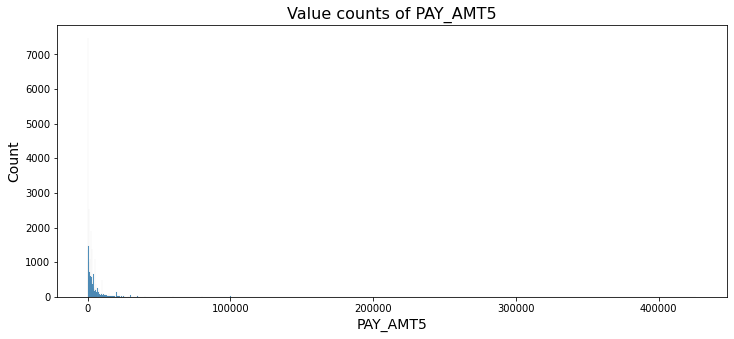

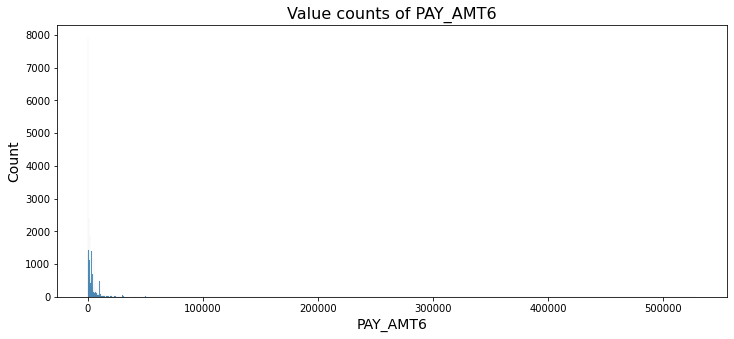

In [29]:
pay_amt = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in pay_amt:
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()
    sns.histplot(data[col], ax=ax)
    plt.title(f'Value counts of {col}', size=16)
    plt.xlabel(col, size=14)
    plt.ylabel('Count', size=14)
    plt.show()  

In [30]:
features = data.columns

for col in features:
    data[col] = data[col].astype(int)

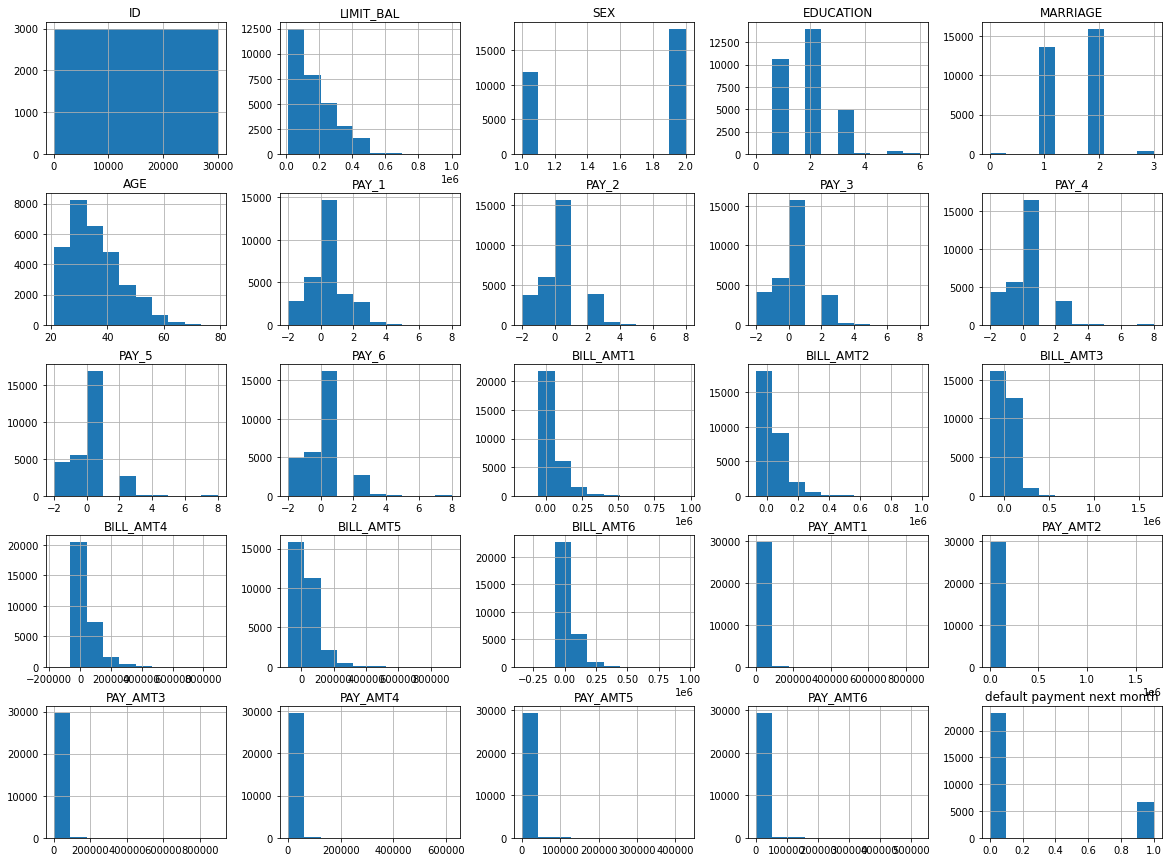

In [31]:
data.hist(figsize=(20,15))
plt.show()

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [33]:
cal_vif(data[[i for i in data.describe().columns if i not in ['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                              'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]])

,Variables,VIF
0,LIMIT_BAL,3.543885
1,SEX,9.088973
2,EDUCATION,6.687151
3,MARRIAGE,6.278864
4,AGE,11.042994
5,PAY_1,1.980413
6,PAY_2,3.162652
7,PAY_3,3.704724
8,PAY_4,4.424868
9,PAY_5,4.959575


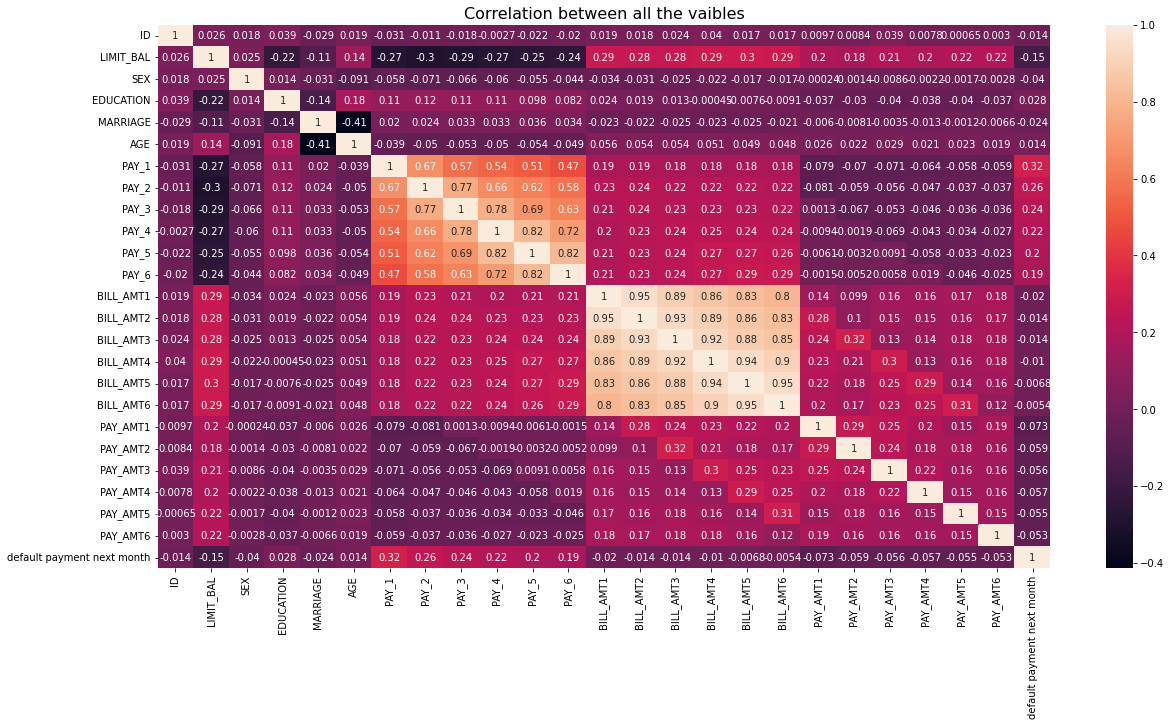

In [34]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [35]:
dependent_variable = 'default payment next month'
independent_variables = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 
                         'PAY_6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [36]:
y = data[dependent_variable]
X = data[independent_variables]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [38]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (24000, 16)
Size of X_test is: (6000, 16)
Size of y_train is: (24000,)
Size of y_test is: (6000,)


In [40]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#Creating the Logistic regression object
regressor = LogisticRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_test = regressor.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test,pred_test)
accuracy

0.8165